In [3]:
# import all the necessary packages
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import pickle
import joblib

In [4]:
# read the csv file
df= pd.read_csv('logistic_regression_updated.csv')

In [5]:

df.head()

,Age,GS,G,Assist_Pct,Usage_Pct,DRtg,Rising_Star
0,24.0,0.0,22.000000,3.8,17.6,106,0
1,24.0,1.0,50.000000,23.9,22.7,109,0
2,25.0,82.0,82.000000,25.6,25.7,112,0
3,20.0,39.0,68.333333,10.5,20.1,111,0
4,25.0,0.0,32.000000,10.6,16.4,106,0


In [6]:
# convert the array values
array = df.values

In [7]:
# assign to the dependent and independent variables
X= array[:,0:6]
Y= array[:,6]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# train and test the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
logmodel= LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# check for p values
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.075557
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.717     
Dependent Variable: y                AIC:              176.4111  
Date:               2020-06-14 13:33 BIC:              206.3637  
No. Observations:   1088             Log-Likelihood:   -82.206   
Df Model:           5                LL-Null:          -290.83   
Df Residuals:       1082             LLR p-value:      5.6756e-88
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.2437      0.0653     3.7343    0.0002     0.1158     0.3717
x2     0.0613      0.0139     4.4040    0.0000     0.

In [14]:
filename = 'finalised_pickle_logmodel_1.sav'

In [15]:
pickle.dump(logmodel, open(filename,'wb'))

In [16]:
########################################### using job lib#################################################################

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [18]:
# generate a no skill prediction( for the majority class)
ns_prob = [0 for _ in range(len(Y_test))]

# predict the probabilities
lr_prob= logmodel.predict_proba(X_test)

# keep the probabilities for positive outcomes only
lr_prob = lr_prob[:,1]


In [19]:
# calculate the scores 
ns_auc = roc_auc_score(Y_test,ns_prob)
lr_auc = roc_auc_score(Y_test,lr_prob)


In [20]:
# summarize the scores
print('Not a star: ROC AUC= %.3f'%(ns_auc))
print('Logistic: ROC AUC= %.3f'%(lr_auc))


Not a star: ROC AUC= 0.500
Logistic: ROC AUC= 0.927


In [21]:
# calculate the roc curvers
ns_fpr,ns_tpr,_ = roc_curve(Y_test,ns_prob)
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob)


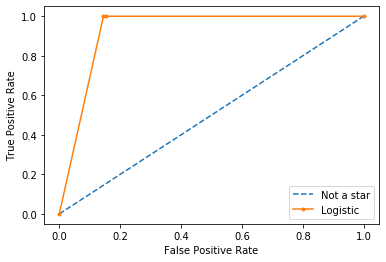

In [22]:
# plot the curve for the model
from matplotlib import pyplot
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Not a star')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [19]:
### precision and recall curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision,lr_recall,_= precision_recall_curve(Y_test,lr_prob)

# predict class values
yhat = logmodel.predict(X_test)
lr_f1,lr_auc = f1_score(Y_test,yhat),auc(lr_recall,lr_precision)

# summarize the scores
print('Logistic: f1=%.3f auc=%.3f'%(lr_f1,lr_auc))

Logistic: f1=0.296 auc=0.657


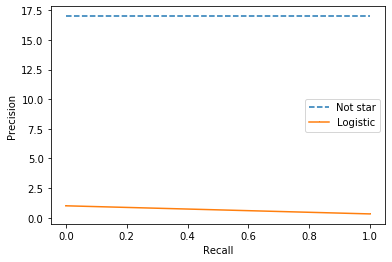

In [20]:
# plot the precision and recall curves
not_star = len(Y_test[Y_test==1]/len(Y_test))
pyplot.plot([0,1],[not_star,not_star], linestyle='--', label= 'Not star')
pyplot.plot(lr_recall,lr_precision,marker=',',label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

#show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
###################### Logisitic Regression on standardised Values ####################################

In [21]:
data = pd.read_csv('logistic_regression_standardised_vif.csv')

In [22]:
data.head()

,Age,GS,G,Assist_Pct,Usage_Pct,DRtg,Rising_Star
0,0.212413,-0.697077,-0.697992,-0.963125,-0.370282,-0.916925,0
1,0.212413,-0.652427,0.424656,0.994419,0.471879,-0.278111,0
2,0.599864,2.964228,1.707684,1.159983,0.967269,0.360703,0
3,-1.337389,1.044275,1.159724,-0.310611,0.042542,0.147765,0
4,0.599864,-0.697077,-0.297046,-0.300871,-0.568438,-0.916925,0


In [24]:
features="+".join(df.columns)

print(features)

Age+GS+G+Assist_Pct+Usage_Pct+DRtg+Rising_Star


In [23]:
y,X = dmatrices('Rising_Star~Age+GS+G+Assist_Pct+Usage_Pct+DRtg',df,return_type='dataframe')

In [24]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.round(1)

,VIF Factor,Features
0,711.3,Intercept
1,1.0,Age
2,2.3,GS
3,2.1,G
4,1.2,Assist_Pct
5,1.3,Usage_Pct
6,1.0,DRtg


In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
#print(logmodel.summary())

predictions = logmodel.predict(x_test)
print('Classification Report')
print(classification_report(y_test, predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('Accuracy Score')
print(accuracy_score(y_test, predictions))



Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       255
           1       0.79      0.88      0.83        17

    accuracy                           0.98       272
   macro avg       0.89      0.93      0.91       272
weighted avg       0.98      0.98      0.98       272

Confusion Matrix
[[251   4]
 [  2  15]]
Accuracy Score
0.9779411764705882


In [26]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold

x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']
kfold= model_selection.KFold(n_splits=10,random_state=None)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.97%


In [27]:
# check for p values
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.075557
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.717     
Dependent Variable: Rising_Star      AIC:              176.4111  
Date:               2020-06-14 12:18 BIC:              206.3637  
No. Observations:   1088             Log-Likelihood:   -82.206   
Df Model:           5                LL-Null:          -290.83   
Df Residuals:       1082             LLR p-value:      5.6756e-88
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.2437    0.0653   3.7343  0.0002   0.1158   0.3717
GS             0.0613    0.0139   4.4040  0.0000   0.0340   0